In [1]:
# Task4_PortfolioOptimization.ipynb

import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Add the project root directory to the Python path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

# Import functions from scripts/portfolio_optimization.py
from scripts.portfolio_optimization import (
    combine_forecasted_data,
    compute_annualized_returns,
    compute_covariance_matrix,
    calculate_portfolio_metrics,
    optimize_portfolio,
    calculate_var,
    plot_cumulative_returns
)

In [2]:
# Example: Load forecasted data for TSLA, BND, and SPY
# Replace these with actual forecasted values if available
tsla_forecast = [800, 810, 820, 830, 840]  # Example Tesla forecast
bnd_forecast = [75, 75.2, 75.4, 75.6, 75.8]  # Example BND forecast
spy_forecast = [450, 455, 460, 465, 470]  # Example SPY forecast

# Combine forecasted data into a single DataFrame
df = combine_forecasted_data(tsla_forecast, bnd_forecast, spy_forecast)
print("Combined Forecasted Data:")
print(df.head())

Combined Forecasted Data:
            TSLA   BND  SPY
2025-02-01   800  75.0  450
2025-02-02   810  75.2  455
2025-02-03   820  75.4  460
2025-02-04   830  75.6  465
2025-02-05   840  75.8  470


In [3]:
# Compute annualized returns
annualized_returns = compute_annualized_returns(df)

# Compute covariance matrix
covariance_matrix = compute_covariance_matrix(df)

Annualized Returns:
TSLA    3.092607
BND     0.669329
SPY     2.754510
dtype: float64
Covariance Matrix:
              TSLA           BND           SPY
TSLA  9.526630e-06  4.462269e-07  7.557513e-06
BND   4.462269e-07  2.090280e-08  3.539972e-07
SPY   7.557513e-06  3.539972e-07  5.995413e-06


In [4]:
# Optimize portfolio weights
risk_free_rate = 0.02  # Risk-free rate (e.g., 2%)
optimized_weights, optimized_return, optimized_risk, optimized_sharpe = optimize_portfolio(
    annualized_returns, covariance_matrix, risk_free_rate
)

# Print optimized results
print("\nOptimized Portfolio Metrics:")
print(f"  Weights: {optimized_weights}")
print(f"  Expected Return: {optimized_return:.2%}")
print(f"  Risk (Volatility): {optimized_risk:.2%}")
print(f"  Sharpe Ratio: {optimized_sharpe:.2f}")

Optimized Weights: [0. 1. 0.]
Optimized Return: 0.6693286114716761
Optimized Risk: 0.00014457799257269028
Optimized Sharpe Ratio: 4491.199524334311

Optimized Portfolio Metrics:
  Weights: [0. 1. 0.]
  Expected Return: 66.93%
  Risk (Volatility): 0.01%
  Sharpe Ratio: 4491.20


Value at Risk (VaR) at 95.0% confidence level: 0.0026465552327622375

Value at Risk (VaR) at 95.0% confidence level: 0.26%


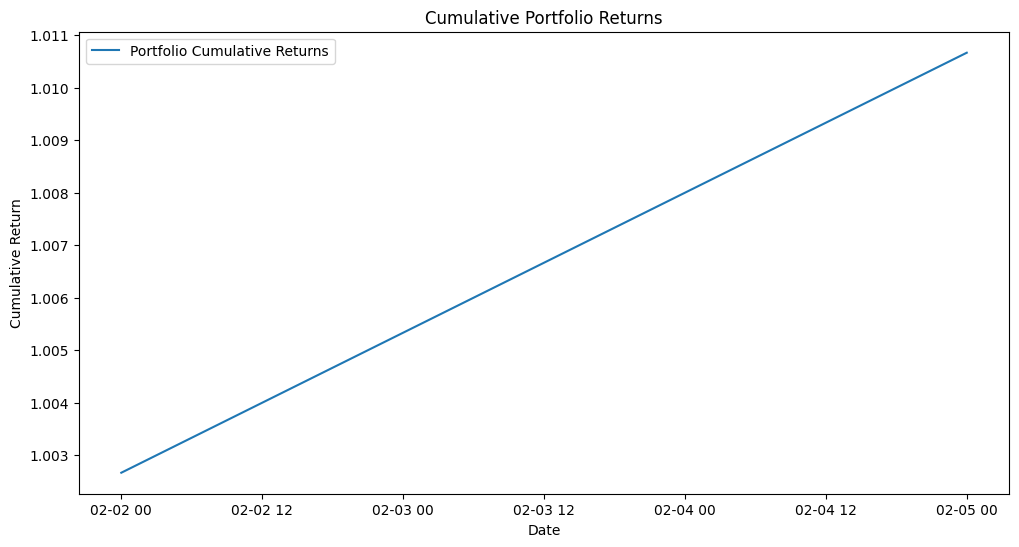

In [5]:
# Calculate Value at Risk (VaR)
confidence_level = 0.95  # 95% confidence level
var = calculate_var(df, optimized_weights, confidence_level)
print(f"\nValue at Risk (VaR) at {confidence_level * 100}% confidence level: {var:.2%}")

# Plot cumulative returns
plot_cumulative_returns(df, optimized_weights)

In [6]:
# Summarize results
print("\nPortfolio Optimization Summary:")
print(f"  Optimized Weights: TSLA={optimized_weights[0]:.2%}, BND={optimized_weights[1]:.2%}, SPY={optimized_weights[2]:.2%}")
print(f"  Expected Return: {optimized_return:.2%}")
print(f"  Risk (Volatility): {optimized_risk:.2%}")
print(f"  Sharpe Ratio: {optimized_sharpe:.2f}")
print(f"  Value at Risk (VaR): {var:.2%} at {confidence_level * 100}% confidence level")


Portfolio Optimization Summary:
  Optimized Weights: TSLA=0.00%, BND=100.00%, SPY=0.00%
  Expected Return: 66.93%
  Risk (Volatility): 0.01%
  Sharpe Ratio: 4491.20
  Value at Risk (VaR): 0.26% at 95.0% confidence level
